In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
import pandas as pd

df = pd.read_csv('amz_uk_price_prediction_dataset.csv')
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


# Part 1: Analyzing Best-Seller Trends Across Product Categories


Crosstab Analysis:

Create a crosstab between the product category and the isBestSeller status.

Are there categories where being a best-seller is more prevalent?

Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.

In [3]:
df.drop("uid", inplace=True, axis=1)
df_categorical = pd.concat([df.select_dtypes("object"), df.select_dtypes("bool")], axis=1)
df_numerical = df.select_dtypes("number")
len(df.columns) == len(df_numerical.columns) + len(df_categorical.columns)

True

In [4]:
df_categorical

,asin,title,category,isBestSeller
0,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",Hi-Fi Speakers,False
1,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",Hi-Fi Speakers,True
2,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",Hi-Fi Speakers,False
3,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",Hi-Fi Speakers,False
4,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,Hi-Fi Speakers,False
...,...,...,...,...
2443646,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",Motorbike Clothing,False
2443647,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,Motorbike Clothing,False
2443648,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,Motorbike Clothing,False
2443649,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,Motorbike Clothing,False


In [5]:
df_numerical

,stars,reviews,price,boughtInLastMonth
0,4.7,15308,21.99,0
1,4.7,98099,23.99,0
2,4.7,15308,21.99,0
3,4.7,7205,31.99,0
4,4.6,1881,17.99,0
...,...,...,...,...
2443646,0.0,0,22.34,0
2443647,0.0,0,97.99,0
2443648,0.0,0,52.99,0
2443649,4.3,404,79.99,0


In [6]:
# make the crosstab
crosstab_result = pd.crosstab(df['category'], df['isBestSeller'])
crosstab_result

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [7]:

# create a column with proportion as values
crosstab_result['proportion'] = crosstab_result[True]/(crosstab_result[True]+crosstab_result[False])
sorted_result = crosstab_result.sort_values(by='proportion', ascending=False)


In [8]:
sorted_result

isBestSeller,False,True,proportion
category,,,
Grocery,9008,556,0.058135
Smart Home Security & Lighting,98,6,0.057692
Health & Personal Care,9017,552,0.057686
Mobile Phone Accessories,248,11,0.042471
Power & Hand Tools,8353,306,0.035339
...,...,...,...
"CD, Disc & Tape Players",8798,0,0.000000
General Music-Making Accessories,259,0,0.000000
Snowboard Boots,1449,0,0.000000


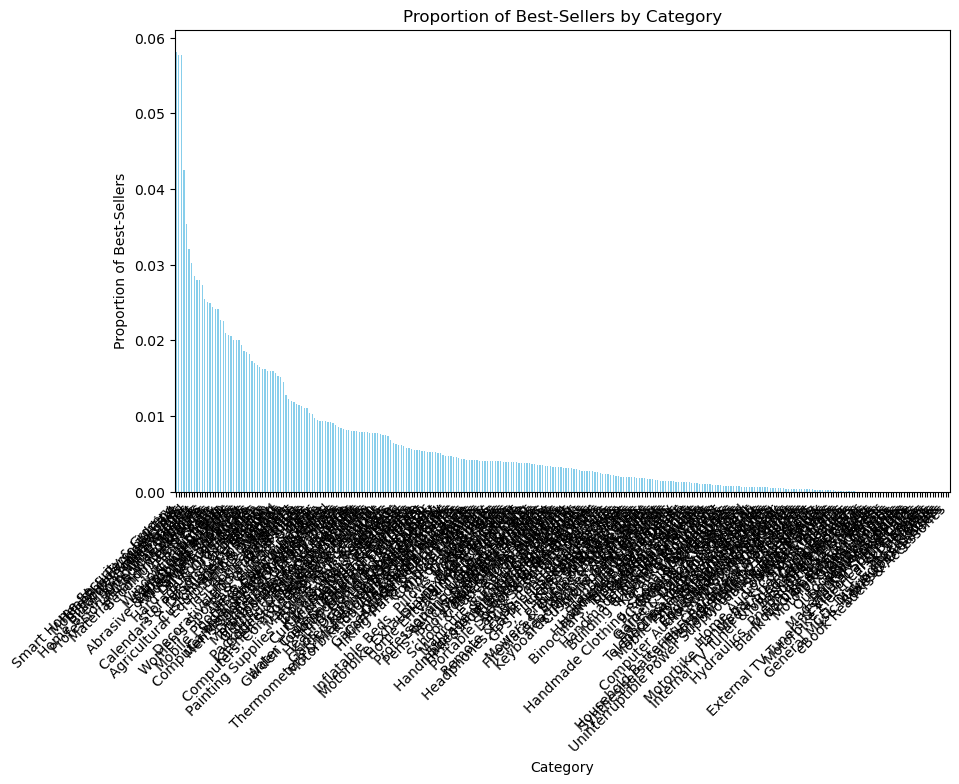

In [9]:
plt.figure(figsize=(10, 6))
sorted_result['proportion'].plot(kind='bar', color='skyblue')
plt.title('Proportion of Best-Sellers by Category')
plt.xlabel('Category')
plt.ylabel('Proportion of Best-Sellers')
plt.xticks(rotation=45, ha='right')
plt.show()

Yes, there are categories that have a higher proportion of best-sellers than other categories

# Statistical Tests:

Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
Compute Cramér's V to understand the strength of association between best-seller status and category.

In [10]:
from scipy.stats import chi2_contingency

chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result)

chi2_statistic, chi2_p_value

(36684.23786636857, 0.0)

In [11]:
crosstab_result.drop('proportion', axis=1, inplace=True)

In [12]:
from scipy.stats.contingency import association

# Computing the association between variables in 'crosstab_result' using the "cramer" method
association(crosstab_result, method="cramer")

0.1222829439760564

# CHI SQUARE TEST
- Since my chi2_p_value is smaller than 0.05 - I reject the null-hypothesis of my Chi Square test. This means there exists an association between my categorical variables in my crosstab table.
# Cramer V Method
- Cramer V result suggests a relatively weak association between the variables in your contingency table.
(Cramér's V value close to 0 suggests a weak association, while a value close to 1 indicates a strong association)

# Visualizations:

Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

<Axes: xlabel='category'>

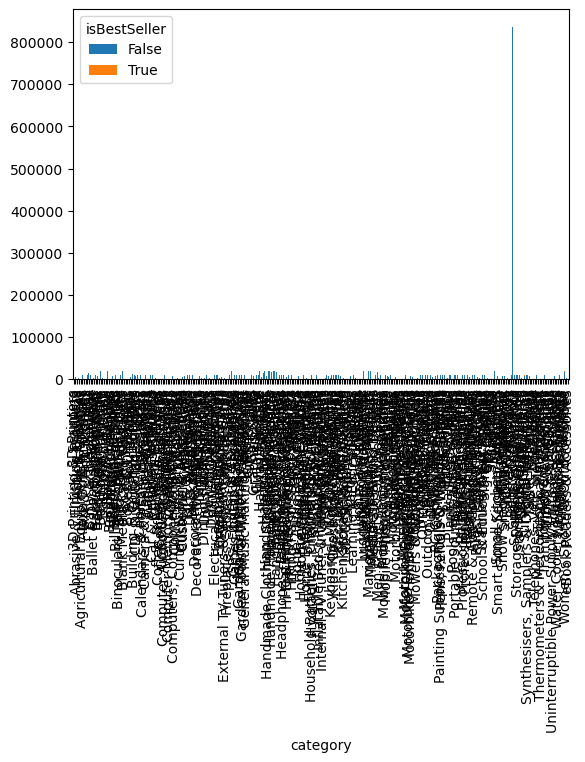

In [13]:
crosstab_result.plot(kind="bar", stacked=True)

# Part 2: Exploring Product Prices and Ratings Across Categories and Brands


Preliminary Step: Remove outliers in product prices.

For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.

Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.

In [14]:
def my_data(data):
    Q1 = data['price'].quantile(0.25)
    Q3 = data['price'].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter out the outliers.
    data = data[(data['price'] > lower_bound) & (data['price'] < upper_bound)]
    
    return data

In [15]:
df_iqr = my_data(df)

In [16]:
df_iqr

,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...
2443646,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


# Violin Plots:

Use a violin plot to visualize the distribution of price across different product categories. Filter out the top 20 categories based on count for better visualization.
Which product category tends to have the highest median price? Don't filter here by top categories.

/var/folders/y1/3bc8xmvj6kgbfb1b2ddrqrvh0000gn/T/ipykernel_2650/1464302199.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_iqr, x='category', y='price', palette="coolwarm")


<Axes: xlabel='category', ylabel='price'>

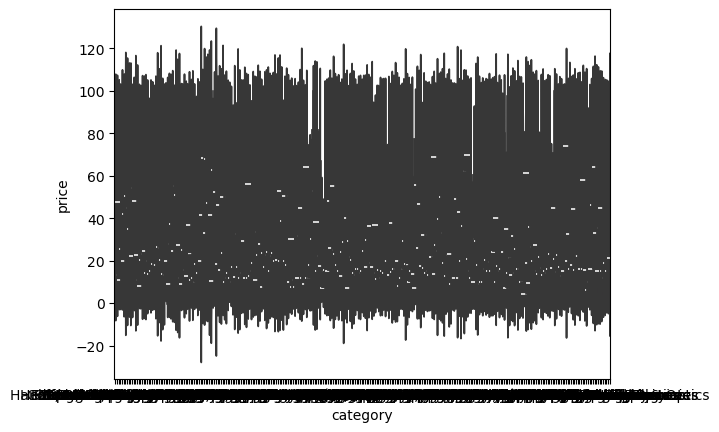

In [17]:
# not filtered
sns.violinplot(data=df_iqr, x='category', y='price', palette="coolwarm")

In [18]:
# filtering with .nlargest(20)

top_categories = df_iqr['category'].value_counts().nlargest(20).index
df_filtered = df_iqr[df_iqr['category'].isin(top_categories)]

/var/folders/y1/3bc8xmvj6kgbfb1b2ddrqrvh0000gn/T/ipykernel_2650/3967705995.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_filtered, x='category', y='price', palette="coolwarm")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Handmade Home & Kitchen Products'),
  Text(1, 0, 'Sports & Outdoors'),
  Text(2, 0, 'Handmade Gifts'),
  Text(3, 0, 'Fragrances'),
  Text(4, 0, 'Skin Care'),
  Text(5, 0, 'Birthday Gifts'),
  Text(6, 0, 'Handmade Kitchen & Dining'),
  Text(7, 0, 'Bath & Body'),
  Text(8, 0, 'Manicure & Pedicure Products'),
  Text(9, 0, 'Beauty'),
  Text(10, 0, 'Handmade Artwork'),
  Text(11, 0, 'Make-up'),
  Text(12, 0, 'Baby'),
  Text(13, 0, 'Handmade Clothing, Shoes & Accessories'),
  Text(14, 0, 'Handmade Home Décor'),
  Text(15, 0, 'Men'),
  Text(16, 0, 'Luggage and travel gear'),
  Text(17, 0, 'Handmade Jewellery'),
  Text(18, 0, 'Women'),
  Text(19, 0, 'Hair Care')])

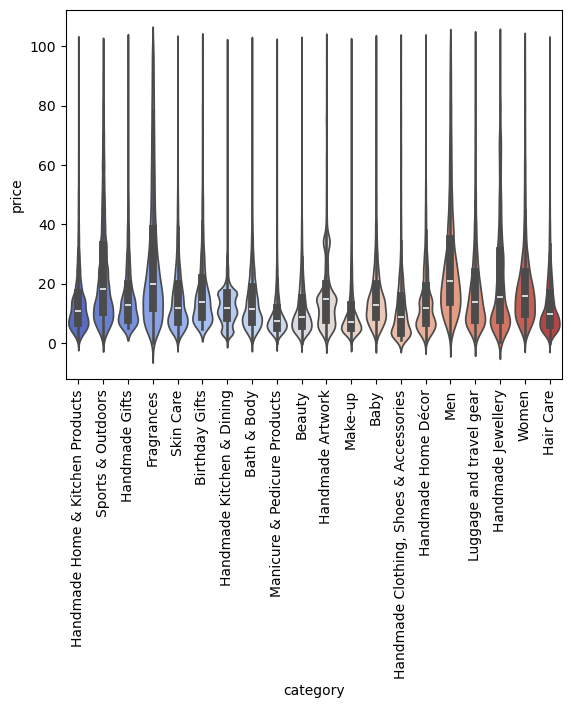

In [19]:
sns.violinplot(data=df_filtered, x='category', y='price', palette="coolwarm")
plt.xticks(rotation=90, ha='center')


In [25]:

df_iqr.groupby('category')['price'].median().sort_values(ascending=False)


category
Desktop PCs              74.00
Boxing Shoes             69.79
Tablets                  69.00
Graphics Cards           68.54
Motherboards             67.92
                         ...  
Adapters                  7.05
Make-up                   7.00
Signs & Plaques           6.99
Arts & Crafts             5.99
Office Paper Products     4.37
Name: price, Length: 296, dtype: float64

It's between Fragrances or Men, can't really tell

# Bar Charts:



- Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
- Which product category commands the highest average price? Don't filter here by top categories.

In [33]:
# find my top 10 categories based on count
top_categories10 = df_iqr['category'].value_counts().nlargest(10).index
top_categories10

Index(['Sports & Outdoors', 'Beauty', 'Bath & Body',
       'Manicure & Pedicure Products',
       'Handmade Clothing, Shoes & Accessories', 'Make-up', 'Skin Care',
       'Hair Care', 'Birthday Gifts', 'Handmade Gifts'],
      dtype='object', name='category')

In [40]:

df_filtered10 = df_iqr[df_iqr['category'].isin(top_categories10)]
df_filtered10 = df_filtered10.groupby('category')['price'].mean().sort_values(ascending=False).reset_index()
df_filtered10 = df_filtered10.rename(columns = {'price':'mean_price'})
df_filtered10

,category,mean_price
0,Sports & Outdoors,25.172065
1,Birthday Gifts,18.600195
2,Handmade Gifts,17.395112
3,Skin Care,15.654722
4,Bath & Body,14.678683
5,Hair Care,13.461408
6,"Handmade Clothing, Shoes & Accessories",12.958639
7,Beauty,12.523480
8,Make-up,10.612918
9,Manicure & Pedicure Products,10.231825


/var/folders/y1/3bc8xmvj6kgbfb1b2ddrqrvh0000gn/T/ipykernel_2650/150578038.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_filtered10, x='category', y='mean_price', palette="coolwarm")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Sports & Outdoors'),
  Text(1, 0, 'Birthday Gifts'),
  Text(2, 0, 'Handmade Gifts'),
  Text(3, 0, 'Skin Care'),
  Text(4, 0, 'Bath & Body'),
  Text(5, 0, 'Hair Care'),
  Text(6, 0, 'Handmade Clothing, Shoes & Accessories'),
  Text(7, 0, 'Beauty'),
  Text(8, 0, 'Make-up'),
  Text(9, 0, 'Manicure & Pedicure Products')])

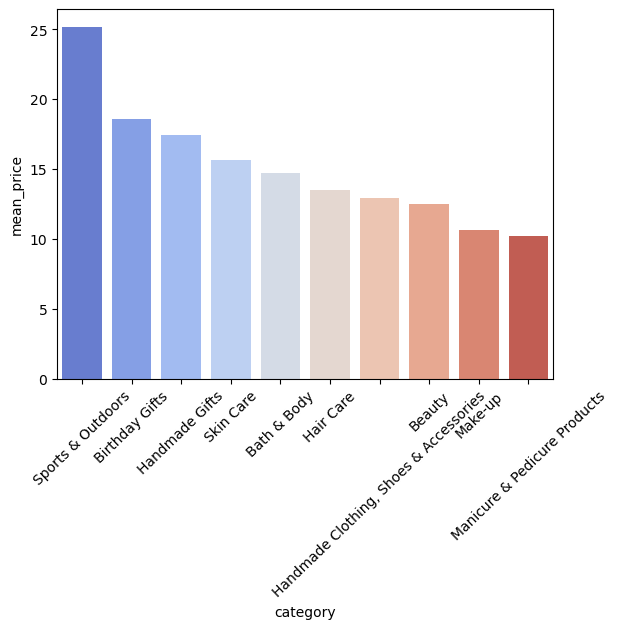

In [45]:
sns.barplot(data=df_filtered10, x='category', y='mean_price', palette="coolwarm")
plt.xticks(rotation=44, ha='center')


Which product category commands the highest average price? Don't filter here by top categories.


In [46]:
df_iqr.groupby('category')['price'].mean().sort_values(ascending=False)


category
Motherboards             68.772432
Boxing Shoes             67.417803
Desktop PCs              66.915562
Tablets                  66.552971
Graphics Cards           65.103509
                           ...    
Bedding Accessories       8.835220
Adapters                  8.750197
Signs & Plaques           8.210513
Arts & Crafts             8.006540
Office Paper Products     6.876369
Name: price, Length: 296, dtype: float64

# Box Plots:

- Visualize the distribution of product ratings based on their category using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
- Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

In [47]:
df_iqr

,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...
2443646,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [62]:
df_iqr['category'].value_counts().nlargest(10).index
df_rating_filter0 = df_iqr[df_iqr['category'].isin(top_categories10)]


/var/folders/y1/3bc8xmvj6kgbfb1b2ddrqrvh0000gn/T/ipykernel_2650/3577205801.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_rating_filter0, x='category', y='stars', palette="coolwarm")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Sports & Outdoors'),
  Text(1, 0, 'Handmade Gifts'),
  Text(2, 0, 'Skin Care'),
  Text(3, 0, 'Birthday Gifts'),
  Text(4, 0, 'Bath & Body'),
  Text(5, 0, 'Manicure & Pedicure Products'),
  Text(6, 0, 'Beauty'),
  Text(7, 0, 'Make-up'),
  Text(8, 0, 'Handmade Clothing, Shoes & Accessories'),
  Text(9, 0, 'Hair Care')])

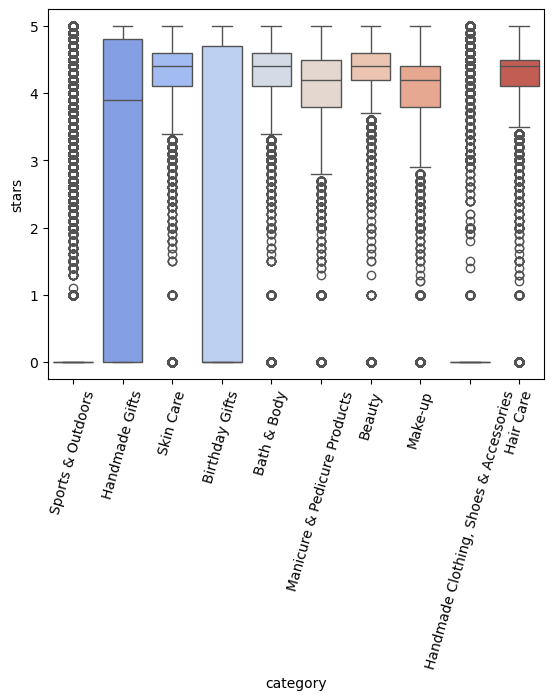

In [66]:
sns.boxplot(data=df_rating_filter0, x='category', y='stars', palette="coolwarm")
plt.xticks(rotation=74, ha='center')


Which category tends to receive the highest median rating from customers? Don't filter here by top categories.


In [68]:
df_iqr.groupby('category')['stars'].mean().sort_values(ascending=False)


category
Luxury Food & Drink                       4.544140
Grocery                                   4.469414
Laptop Accessories                        4.449600
Health & Personal Care                    4.439549
Arts & Crafts                             4.432942
                                            ...   
Boxing Shoes                              0.160470
Motorbike Handlebars, Controls & Grips    0.134289
Motorbike Electrical & Batteries          0.105697
3D Printing & Scanning                    0.094067
CD, Disc & Tape Players                   0.048834
Name: stars, Length: 296, dtype: float64

# Part 3: Investigating the Interplay Between Product Prices and Ratings


Correlation Coefficients:

- Calculate the correlation coefficient between price and stars.
- Is there a significant correlation between product price and its rating?

In [72]:
correlation = df_iqr['price'].corr(df_iqr['stars'])
correlation

-0.07767299878181444

no, only a slight negative correlation.

Visualizations:

- Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
- Use a correlation heatmap to visualize correlations between all numerical variables.
- Examine if product prices typically follow a normal distribution using a QQ plot.

<Axes: xlabel='stars', ylabel='price'>

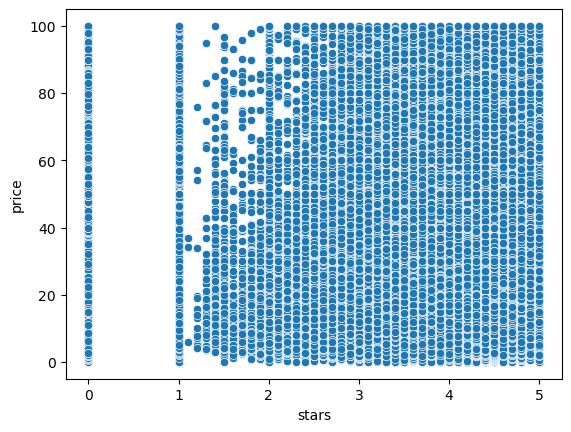

In [73]:
sns.scatterplot(data=df_iqr, x='stars', y='price')

no patterns

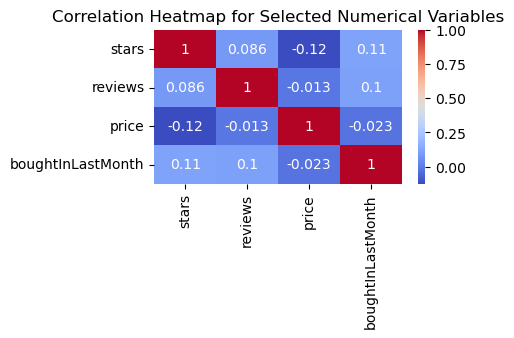

In [80]:
correlation_matrix = df_numerical.corr()

plt.figure(figsize=(4, 2))

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()


- Examine if product prices typically follow a normal distribution using a QQ plot.


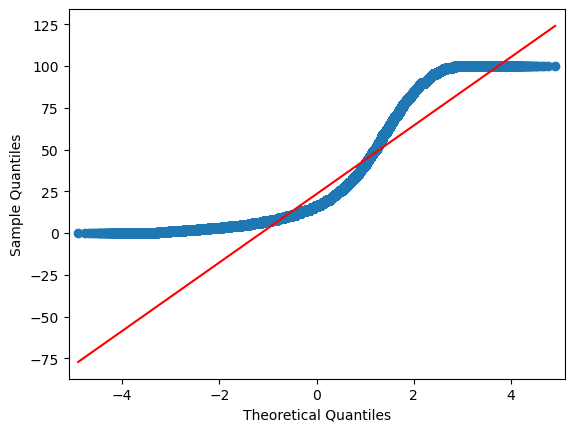

In [82]:
import statsmodels.api as sm

sm.qqplot(df_iqr['price'], line='s');

no, not normal